In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('/content/Program_3a_Dataset.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe


<bound method NDFrame.describe of        age          job   marital          education  default housing loan  \
0       56    housemaid   married           basic.4y       no      no   no   
1       57     services   married        high.school  unknown      no   no   
2       37     services   married        high.school       no     yes   no   
3       40       admin.   married           basic.6y       no      no   no   
4       56     services   married        high.school       no      no  yes   
...    ...          ...       ...                ...      ...     ...  ...   
41183   54  blue-collar  divorced           basic.4y       no      no   no   
41184   55      unknown   married           basic.4y  unknown     yes   no   
41185   34     services   married        high.school       no      no   no   
41186   52   technician   married           basic.9y       no     yes   no   
41187   41       admin.   married  university.degree       no     yes   no   

         contact month day_of

In [5]:
data.shape

(41188, 21)

In [6]:
data.info

<bound method DataFrame.info of        age          job   marital          education  default housing loan  \
0       56    housemaid   married           basic.4y       no      no   no   
1       57     services   married        high.school  unknown      no   no   
2       37     services   married        high.school       no     yes   no   
3       40       admin.   married           basic.6y       no      no   no   
4       56     services   married        high.school       no      no  yes   
...    ...          ...       ...                ...      ...     ...  ...   
41183   54  blue-collar  divorced           basic.4y       no      no   no   
41184   55      unknown   married           basic.4y  unknown     yes   no   
41185   34     services   married        high.school       no      no   no   
41186   52   technician   married           basic.9y       no     yes   no   
41187   41       admin.   married  university.degree       no     yes   no   

         contact month day_of_w

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Heatmap**

<ipython-input-9-adb3e53d481f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'magma', annot =True)


<Axes: >

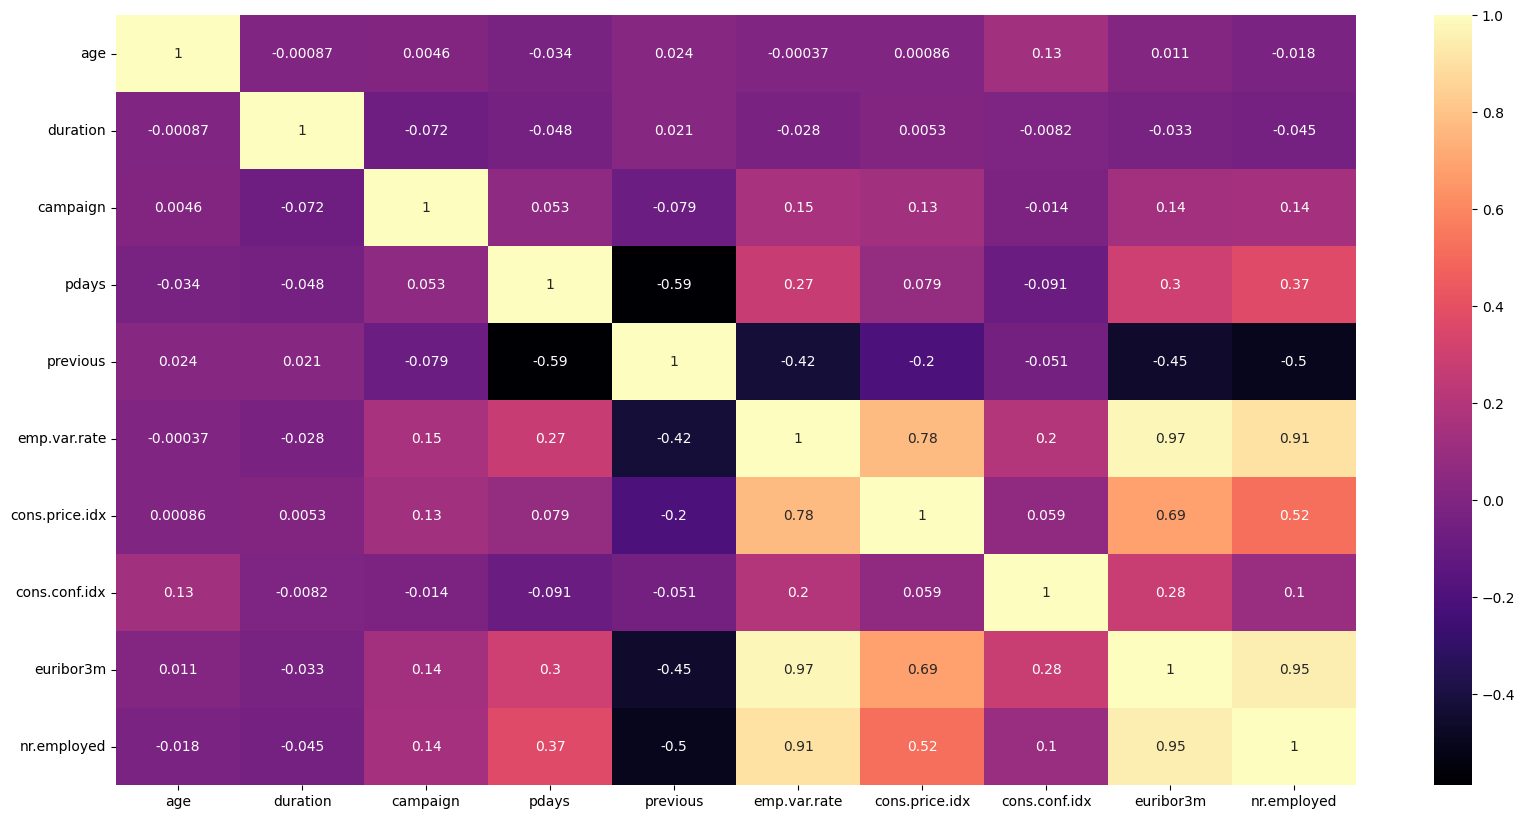

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap = 'magma', annot =True)

In [13]:
features=['duration','age','campaign']
x=data[features]
y=data[['y']]

**Logistic** **Regression**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
# Make predictions on the training set
train_predictions = model.predict(X_resampled)
train_accuracy = accuracy_score(y_resampled, train_predictions)

# Make predictions on the test set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

In [28]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.74
Testing Accuracy: 0.79


**classification accuracy rate of the model on both train and test data**

In [29]:
from sklearn.metrics import classification_report

# Display Classification Report
print('\nClassification Report on Test Set:')
print(classification_report(Y_test, test_predictions))



Classification Report on Test Set:
              precision    recall  f1-score   support

          no       0.95      0.80      0.87     10969
         yes       0.30      0.66      0.41      1388

    accuracy                           0.79     12357
   macro avg       0.62      0.73      0.64     12357
weighted avg       0.88      0.79      0.82     12357



**Confusion Matrix**

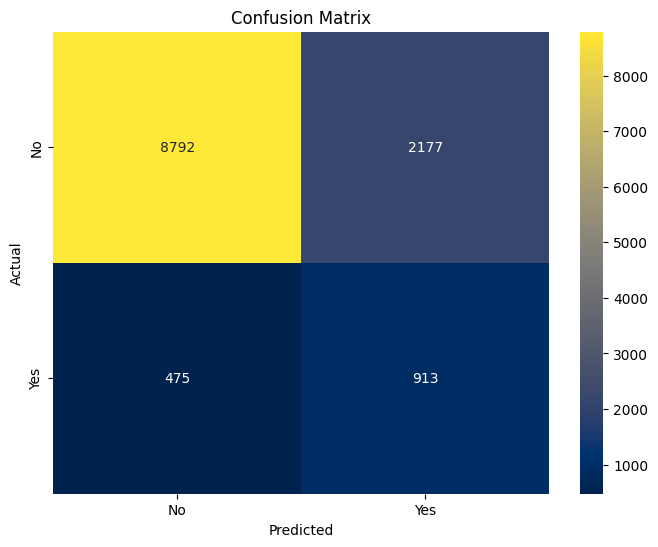

In [35]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Program-2**

In [41]:
df=pd.read_csv('/content/Program_3b_dataset.csv')

In [42]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [43]:
df.describe

<bound method NDFrame.describe of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [45]:
df.shape

(1372, 5)

In [46]:
features=['variance', 'skewness', 'curtosis', 'entropy']
A=df[features]
B=df[['class']]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.3, random_state = 42)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



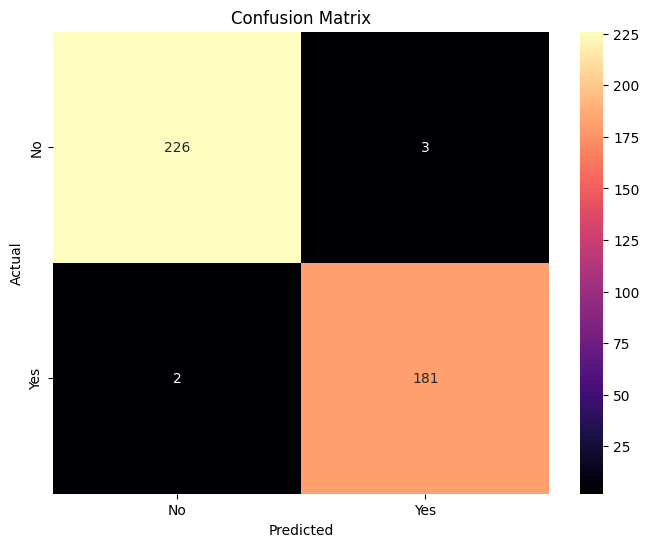

In [50]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()